In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt

In [2]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn import compose
from sklearn import pipeline
from sklearn import metrics

In [3]:
diabetes_data = pd.read_csv("8k_diabetes.csv", delimiter=',')

In [12]:
X = diabetes_data[["race", "gender"]]
Y = diabetes_data.loc[:,"readmitted"].astype(int)

In [17]:
Y.sum()/len(Y)

0.39725

In [78]:
log_elastic = linear_model.LogisticRegression(
    solver = "saga",
    penalty="elasticnet",
    l1_ratio=0.5,
    max_iter=10000
)

log_lasso = linear_model.LogisticRegression(
    solver = "saga",
    penalty="l1",
    max_iter=10000
)

log_ridge = linear_model.LogisticRegression(
    solver = "saga",
    penalty="l2",
    max_iter=10000
)

In [46]:
def print_pipeline(model, X, Y, cv=5, scoring="accuracy"):
    pipe = pipeline.make_pipeline(column_trans, model)
    print(model_selection.cross_val_score(pipe, X, Y, cv=cv, scoring=scoring).mean())
    pipe.fit(X,Y)
    metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

The initial model will be trained on race and gender, two categorical variables.

Create a column transformer to encode race and gender. All other columns will be left as is with this transfomer.

In [104]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(sparse=False), ["race", "gender"]),
     remainder="passthrough"
)

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


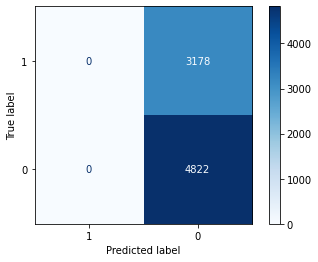

In [37]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
print(model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="accuracy").mean())
pipe.fit(X,Y)
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


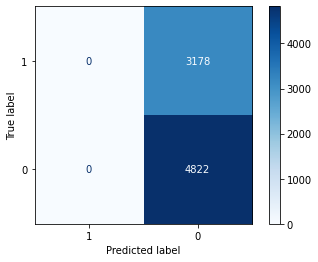

In [52]:
print_pipeline(log_elastic, X, Y, cv=5, scoring="accuracy")

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


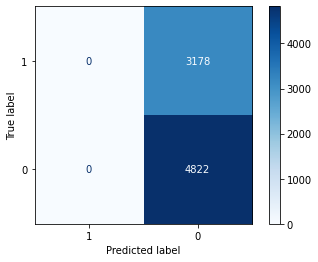

In [48]:
print_pipeline(log_lasso, X, Y, cv=5, scoring="accuracy")

0.60275


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


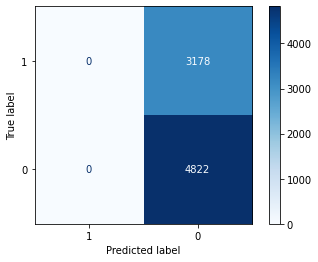

In [49]:
print_pipeline(log_ridge, X, Y, cv=5, scoring="accuracy")

As we can see from the confusion matrix above, we have created a naive model that classifies every patient as "not readmitted".

I will now try the same procedue without using pipeline functionality.

In [66]:
pd.get_dummies(X)

,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
7995,0,0,0,1,0,0,0,1
7996,0,0,0,1,0,0,1,0
7997,0,0,0,1,0,0,0,1
7998,0,0,0,1,0,0,0,1


In [64]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(pd.get_dummies(X), Y)

In [65]:
log_reg_lbfgs = linear_model.LogisticRegression(
    solver="lbfgs"
)
log_reg_lbfgs.fit(x_train, y_train)

LogisticRegression()

In [67]:
log_reg_lbfgs.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
log_reg_lbfgs.score(x_test, y_test)

0.5955

Now I will go back to using the data pipeline and add new features to the model.

In [72]:
X = diabetes_data[["race", "gender", "num_medications"]]

<AxesSubplot:>

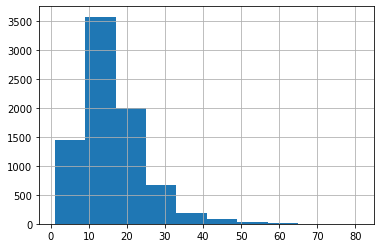

In [73]:
X["num_medications"].hist()

0.601


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


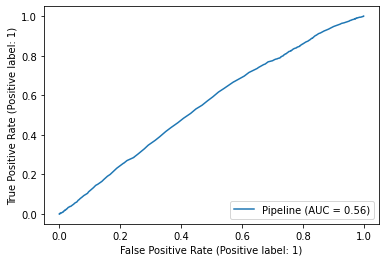

In [79]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
print(model_selection.cross_val_score(pipe, X, Y, cv=5, scoring="accuracy").mean())
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


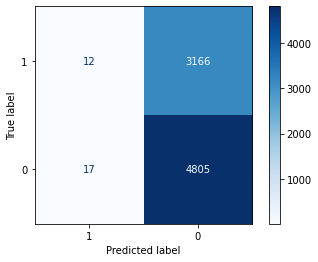

In [80]:
metrics.plot_confusion_matrix(pipe, X, Y, cmap="Blues", labels=[1,0])

In [92]:
X = diabetes_data[[
    "race",
    "gender",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient"
]]


In [93]:
X

,race,gender,num_medications,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient
0,Caucasian,Female,21,1,35,4,0
1,Caucasian,Female,5,2,8,5,0
2,Caucasian,Male,21,7,12,0,0
3,AfricanAmerican,Female,5,4,33,1,0
4,AfricanAmerican,Female,13,5,31,0,0
...,...,...,...,...,...,...,...
7995,Caucasian,Male,27,8,56,2,0
7996,Caucasian,Female,18,2,44,0,0
7997,Caucasian,Male,16,1,25,0,0
7998,Caucasian,Male,22,7,61,0,0


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


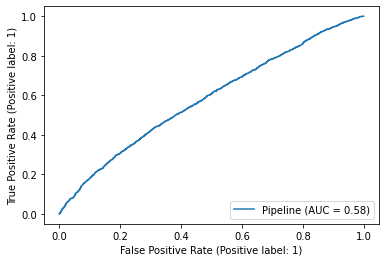

In [95]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

In [105]:
X = diabetes_data[[
    "race",
    "gender",
    "admission_type_id",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses"
]]

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


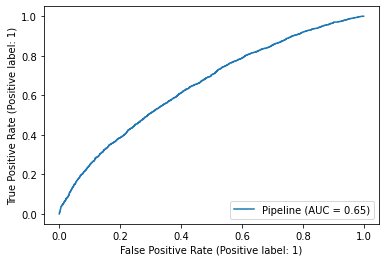

In [100]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

In [103]:
diabetes_data

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,Caucasian,Female,[50-60),?,Elective,Discharged to home,Physician Referral,1,CP,Surgery-Neuro,...,No,No,No,No,No,No,False,Spinal stenosis in cervical region,Spinal stenosis in cervical region,"Effusion of joint, site unspecified"
1,Caucasian,Female,[20-30),[50-75),Urgent,Discharged to home,Physician Referral,2,UN,?,...,No,No,No,No,No,No,False,"First-degree perineal laceration, unspecified ...","Diabetes mellitus of mother, complicating preg...",Sideroblastic anemia
2,Caucasian,Male,[80-90),?,Not Available,Discharged/transferred to home with home healt...,NaN,7,MC,Family/GeneralPractice,...,No,No,No,No,No,Yes,True,Pneumococcal pneumonia [Streptococcus pneumoni...,"Congestive heart failure, unspecified",Hyperosmolality and/or hypernatremia
3,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Transfer from another health care facility,4,UN,?,...,No,No,No,No,No,Yes,False,Cellulitis and abscess of face,Streptococcus infection in conditions classifi...,Diabetes mellitus without mention of complicat...
4,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Emergency Room,5,?,Psychiatry,...,No,No,No,No,Ch,Yes,False,"Bipolar I disorder, single manic episode, unsp...",Diabetes mellitus without mention of complicat...,Depressive type psychosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Caucasian,Male,[70-80),?,Elective,Discharged/transferred to SNF,Physician Referral,8,?,Surgery-Cardiovascular/Thoracic,...,No,No,No,No,No,Yes,False,Atherosclerosis of aorta,Cerebral thrombosis without mention of cerebra...,Paroxysmal supraventricular tachycardia
7996,Caucasian,Female,[50-60),?,Urgent,Discharged to home,Emergency Room,2,UN,Emergency/Trauma,...,No,No,No,No,Ch,Yes,False,Disorders of mineral metabolism,Alteration of consciousness,Disorders of mineral metabolism
7997,Caucasian,Male,[50-60),?,Emergency,Discharged/transferred to another short term h...,NaN,1,?,?,...,No,No,No,No,Ch,Yes,False,Coronary atherosclerosis of unspecified type o...,Postmyocardial infarction syndrome,Hyperosmolality and/or hypernatremia
7998,Caucasian,Male,[80-90),?,Urgent,Discharged/transferred to SNF,Emergency Room,7,MC,Surgery-General,...,No,No,No,No,Ch,Yes,False,"Congestive heart failure, unspecified",Paroxysmal supraventricular tachycardia,Endomyocardial fibrosis


In [107]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(sparse=False), ["race", "gender", "admission_type_id"]),
     remainder="passthrough"
)

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


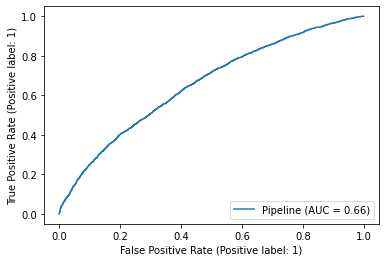

In [108]:
pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)

In [110]:
diabetes_data.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [134]:
diabetes_data["payer_code"]

0       CP
1       UN
2       MC
3       UN
4        ?
        ..
7995     ?
7996    UN
7997     ?
7998    MC
7999     ?
Name: payer_code, Length: 8000, dtype: object

In [135]:
X = diabetes_data[[
    "race",
    "gender",
    "admission_type_id",
    "insulin",
    "diabetesMed",
    "change",
    "num_medications",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses",
    "payer_code"
]]

/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


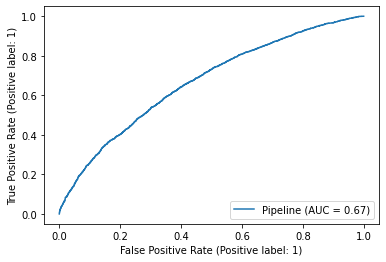

In [136]:
column_trans = compose.make_column_transformer(
    (preprocessing.OneHotEncoder(sparse=False), [
        "race",
        "gender",
        "admission_type_id",
        "insulin",
        "diabetesMed",
        "change",
        "payer_code"
    ]),
     remainder="passthrough"
)

pipe = pipeline.make_pipeline(column_trans, log_elastic)
pipe.fit(X,Y)
metrics.plot_roc_curve(pipe, X, Y)


/home/luca/anaconda3/envs/assignment2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


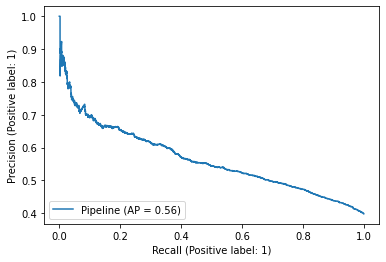

In [138]:
metrics.plot_precision_recall_curve(pipe, X, Y)